In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_learning/NationalNames.csv")

In [4]:
#data preprocessing
data['Name'].unique()

array(['Mary', 'Anna', 'Emma', ..., 'Zijun', 'Zilas', 'Zirui'],
      dtype=object)

In [5]:
#counting the unique names
data['Name'].nunique()

93889

In [6]:
#label encoding---another method
data['Gender']=data['Gender'].astype('category').cat.codes

In [7]:
df=data.groupby('Name').mean()['Gender'].reset_index()

In [8]:
#float into integer
df['Gender']=df['Gender'].astype('int')

In [9]:
#convert word to vector
import string

In [10]:
letters=list(string.ascii_lowercase)

In [11]:
vocab=dict(zip(letters,range(1,27)))

In [12]:
def word_num():
    for i in range(0,df.shape[0]):
        seq=[vocab[letters.lower()]for letters in df['Name'][i]]
        df['Name'][i]=seq
word_num()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
x=df['Name'].values

In [14]:
y=df['Gender'].values

In [15]:
name_length=[len(x[i])for i in range(0,df.shape[0])]

In [16]:
import matplotlib.pyplot as plt

(array([  147.,   942.,     0.,  5141., 15774.,     0., 26116., 24397.,
            0., 13500.,  5211.,     0.,  1661.,   573.,     0.,   211.,
          122.,     0.,    61.,    33.]),
 array([ 2.  ,  2.65,  3.3 ,  3.95,  4.6 ,  5.25,  5.9 ,  6.55,  7.2 ,
         7.85,  8.5 ,  9.15,  9.8 , 10.45, 11.1 , 11.75, 12.4 , 13.05,
        13.7 , 14.35, 15.  ]),
 <a list of 20 Patch objects>)

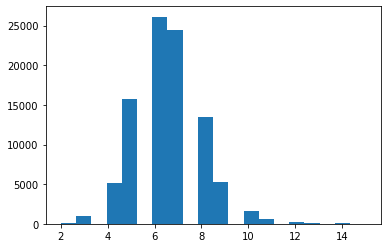

In [17]:
plt.hist(name_length,bins=20)

In [18]:
plt.show()

In [19]:
from keras.preprocessing.sequence import pad_sequences

In [20]:
x=pad_sequences(df['Name'].values,maxlen=10,padding='pre')

In [21]:
from keras.layers import Input,Embedding,Dense,LSTM

In [22]:
from keras.models import Model

In [23]:
vocab_size=len(vocab)+1

In [24]:
inp=Input(shape=(10,))

In [25]:
emb=Embedding(input_dim=vocab_size,output_dim=5)(inp)

In [26]:
lstm1=LSTM(units=32,return_sequences=True)(emb)

In [28]:
lstm2=LSTM(units=32)(lstm1)


In [29]:
out=Dense(units=1,activation='sigmoid')(lstm2)

In [30]:
lstm_model=Model(inputs=inp,outputs=out)

In [31]:
lstm_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 10, 5)             135       
_________________________________________________________________
lstm (LSTM)                  (None, 10, 32)            4864      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 13,352
Trainable params: 13,352
Non-trainable params: 0
_________________________________________________________________


In [33]:
lstm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [36]:
model_his=lstm_model.fit(x,y,epochs=10,batch_size=256,validation_split=0.2)

Epoch 1/10
294/294 [==============================] - 26s 26ms/step - loss: 0.6080 - acc: 0.6862 - val_loss: 0.4218 - val_acc: 0.8125
Epoch 2/10
294/294 [==============================] - 6s 22ms/step - loss: 0.4074 - acc: 0.8106 - val_loss: 0.3868 - val_acc: 0.8214
Epoch 3/10
294/294 [==============================] - 6s 22ms/step - loss: 0.3928 - acc: 0.8157 - val_loss: 0.3879 - val_acc: 0.8199
Epoch 4/10
294/294 [==============================] - 6s 22ms/step - loss: 0.3880 - acc: 0.8183 - val_loss: 0.3828 - val_acc: 0.8246
Epoch 5/10
294/294 [==============================] - 6s 22ms/step - loss: 0.3857 - acc: 0.8185 - val_loss: 0.3789 - val_acc: 0.8256
Epoch 6/10
294/294 [==============================] - 6s 22ms/step - loss: 0.3880 - acc: 0.8182 - val_loss: 0.3767 - val_acc: 0.8275
Epoch 7/10
294/294 [==============================] - 7s 22ms/step - loss: 0.3793 - acc: 0.8249 - val_loss: 0.3813 - val_acc: 0.8268
Epoch 8/10
294/294 [==============================] - 7s 23ms/step -

In [37]:
#Accuracy
plt.figure(dpi=300)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

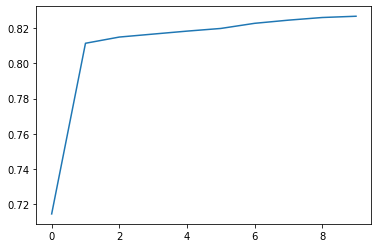

In [38]:
plt.plot(model_his.history['acc'])

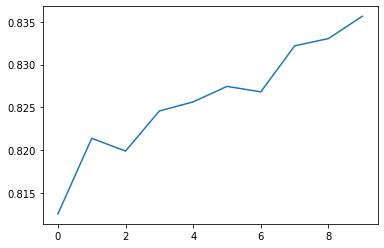

In [39]:
plt.plot(model_his.history['val_acc'])

In [40]:
#prediction
name="anna"

In [41]:
test_name=name.lower()

In [42]:
seq=[vocab[i]for i in test_name]

In [43]:
x_test=pad_sequences([seq],10)

In [44]:
y_pred=lstm_model.predict(x_test)

In [45]:
if y_pred<0.5:
    print('female')
else:
    print('male')

female
